In [40]:
import numpy as np

In [41]:
model_dir = './model/'

In [42]:
vi_loss = np.load(model_dir+'vi-attn-loss1.npy')

In [43]:
len(vi_loss)

185

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

output_path = './plots/'
def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    loc = ticker.MultipleLocator(base=0.2) # put ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

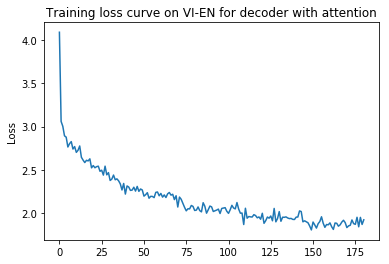

In [50]:
# showPlot(vi_loss)
plt.plot(vi_loss)
plt.title('Training loss curve on VI-EN for decoder with attention')
plt.ylabel('Loss')
plt.savefig(output_path+'vi_attn_loss.png')
plt.show()

In [55]:
loss_300 = np.load(model_dir+'vi-attn-loss1.npy')
loss_100 = np.load(model_dir+'vi-attn-loss2.npy')
loss_500 = np.load(model_dir+'vi-attn-loss0.npy')

In [57]:
rem = []
for i in range(len(loss_300)):
    if i > 0 and i < len(loss_300-1):
        if loss_300[i]-loss_300[i-1] > 1 and loss_300[i]-loss_300[i+1] > 1:
            rem.append(i)

In [63]:
loss_300_ = []
loss_100_ = []
loss_500_ = []
for i in range(len(loss_300)):
    if i in rem:
        continue
    loss_300_.append(loss_300[i])
    loss_100_.append(loss_100[i])    
    loss_500_.append(loss_500[i])    

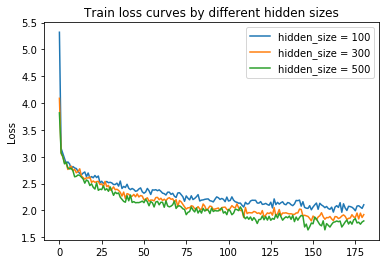

In [70]:
# plt.plot(loss_300_)
plt.clf()
# for i, val_loss in enumerate(val_loss_total):
#     plt.plot(val_loss, label='Val, hidden_size = %d' % hidden_sizes[i])
    
# for i, trn_loss in enumerate(trn_loss_total):
#     plt.plot(trn_loss, label='Train, hidden_size = %d' % hidden_sizes[i])
    
plt.plot(loss_100_, label='hidden_size = 100')
plt.plot(loss_300_, label='hidden_size = 300')
plt.plot(loss_500_, label='hidden_size = 500')
plt.title('Train loss curves by different hidden sizes')
plt.ylabel('Loss')
plt.legend()
plt.savefig(model_dir+'rnn_hidden_size_loss.png')
plt.show()